In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel("BankReviews.xlsx")
df.head()

,Date,Stars,Reviews,BankName
0,2017-04-10,5,"Great job, Wyndham Capital! Each person was pr...",Wyndham Capital Mortgage
1,2017-02-10,5,Matthew Richardson is professional and helpful...,Wyndham Capital Mortgage
2,2017-08-21,5,We had a past experience with Wyndham Mortgage...,Wyndham Capital Mortgage
3,2017-12-17,5,We have been dealing with Brad Thomka from the...,Wyndham Capital Mortgage
4,2016-05-27,5,I can't express how grateful I am for the supp...,Wyndham Capital Mortgage


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Date        505 non-null datetime64[ns]
Stars       505 non-null int64
Reviews     505 non-null object
BankName    505 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 15.9+ KB


In [4]:
df01= df.copy()

In [5]:
df01.drop(columns=['Date', 'BankName'], inplace=True)

In [6]:
df01.head()

,Stars,Reviews
0,5,"Great job, Wyndham Capital! Each person was pr..."
1,5,Matthew Richardson is professional and helpful...
2,5,We had a past experience with Wyndham Mortgage...
3,5,We have been dealing with Brad Thomka from the...
4,5,I can't express how grateful I am for the supp...


In [7]:
import  textblob
from textblob import TextBlob

In [10]:
df01['sentiment'] = df01["Reviews"].apply(lambda x: TextBlob(x).sentiment.polarity )

In [11]:
df.Stars.value_counts()

5    410
1     95
Name: Stars, dtype: int64

In [12]:
#neutral  perscent
neutral_br_percent= ((df01['sentiment']== 0).sum())/len(df01['Reviews'])*100
print(neutral_br_percent)

0.7920792079207921


In [13]:
#negative  perscent
negative_br_percent= ((df01['sentiment']< 0).sum())/len(df01['Reviews'])*100
print(negative_br_percent)

6.9306930693069315


In [14]:
#positive percent
positive_br_percent= ((df01['sentiment']> 0).sum())/len(df01['Reviews'])*100
print(positive_br_percent)

92.27722772277228


In [15]:
X= df01.Reviews

In [16]:
y= df01.Stars

In [17]:
### for faster access

In [18]:
import pickle

In [19]:
X_br= pickle.loads(pickle.dumps(X))

In [20]:
y_br= pickle.loads(pickle.dumps(y))

In [21]:
# Creating the corpus
import re
corpus = []
for i in range(0, len(X_br)):
    review = re.sub(r'\W', ' ', str(X_br[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    corpus.append(review) 

In [22]:
corpus[0]

'great job wyndham capital each person was professional and helped us move through our refinance process smoothly thank you '

###  Lemmetization

In [23]:
import nltk
from nltk.corpus import stopwords

In [24]:
from nltk.stem import WordNetLemmatizer

In [26]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Krn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [27]:

# sentences = nltk.sent_tokenize(paragraph)

lemmatizer = WordNetLemmatizer()
# Lemmatization
for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus[i])
    words = [lemmatizer.lemmatize(word) for word in words]
    corpus[i] = ' '.join(words)   

In [28]:
corpus[0]

'great job wyndham capital each person wa professional and helped u move through our refinance process smoothly thank you'

###  tfidf model build

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
vectorizer = TfidfVectorizer(max_features = 1000, min_df = 0.05, max_df = 0.95, stop_words = stopwords.words('english'))
X_br = vectorizer.fit_transform(corpus).toarray()


In [31]:
X_br.shape

(505, 137)

In [32]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid,  valid_y, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

###  Model Build

In [36]:
### Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
from sklearn.model_selection import train_test_split

train_x_lg,test_x_lg,train_y_lg,test_y_lg= train_test_split(X_br,
                                              y_br,
                                              test_size=.3,
                                              random_state=123)

In [37]:
#Logistic Regression
# Logistic Regression on Count Vectors and TF-IDF
accuracy_L1 = train_model(LogisticRegression(), train_x_lg, train_y_lg, test_x_lg, test_y_lg)
print("LR  for L1, Count Vectors: ", accuracy_L1)

LR  for L1, Count Vectors:  0.8355263157894737


In [38]:
logreg = LogisticRegression()
logreg.fit( train_x_lg, train_y_lg )

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
#Evalutaing model
#from sklearn import metrics


In [40]:
test_accuracy=metrics.accuracy_score(test_y_lg,logreg.predict(test_x_lg))
print('test_accuracy: ',test_accuracy)

train_accuracy=metrics.accuracy_score(train_y_lg,logreg.predict(train_x_lg))
print('train_accuracy: ',train_accuracy)

test_accuracy:  0.8355263157894737
train_accuracy:  0.9121813031161473


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 15.0, 'Predicted label')

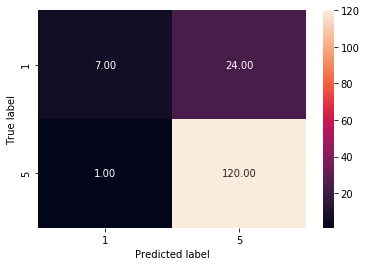

In [42]:
# Creating a confusion matrix
cm = metrics.confusion_matrix(test_y_lg,
                            logreg.predict(test_x_lg), [1,5] )
cm


sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "5"] , yticklabels = ["1", "5"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [43]:
###Linear Svc
from sklearn import  svm


In [44]:
train_x_l_svc, test_x_l_svc, train_y_l_svc, test_y_l_svc= train_test_split(X_br,
                                              y_br,
                                              test_size=.3,
                                              random_state=123)

In [45]:
# Linear SVC on Count Vectors and TF-IDF
accuracy_L2 = train_model(svm.LinearSVC(), train_x_l_svc, train_y_l_svc, test_x_l_svc, test_y_l_svc)
print(accuracy_L2)

0.9407894736842105


In [46]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier

In [47]:
train_x_rf, test_x_rf, train_y_rf, test_y_rf= train_test_split(X_br,
                                              y_br,
                                              test_size=.3,
                                              random_state=123)

In [48]:


accuracy_L3 = train_model(RandomForestClassifier(), train_x_rf, train_y_rf, test_x_rf, test_y_rf)
print( accuracy_L3)

0.868421052631579


In [49]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Linear SVC','Random Forest'],
    
    'Score': [accuracy_L1,accuracy_L2, accuracy_L3]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Linear SVC,0.940789
2,Random Forest,0.868421
0,Logistic Regression,0.835526


###  Final Prediction 


In [50]:
model= svm.LinearSVC().fit(train_x_l_svc, train_y_l_svc)


In [51]:
#Concatenating final prediction with original data set(all obersvations):

predicted=pd.DataFrame(model.predict(X_br))
  
testfile = pd.concat([df, predicted], axis=1)



In [52]:
testfile.rename(columns={0: 'Predicted Stars'},inplace=True)

In [54]:
errors= testfile.loc[testfile.Stars!= testfile['Predicted Stars']]
errors.count()

Date               15
Stars              15
Reviews            15
BankName           15
Predicted Sales    15
dtype: int64

In [55]:
#Exporting testfile to csv for final submission

testfile.to_csv('Review_submission.csv',index=False)